In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [31]:
data = pd.read_csv('CustomerRecords.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [32]:
data.shape

(10000, 18)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [34]:
data.describe(include='O')

,Surname,Geography,Gender,Card Type
count,10000,10000,10000,10000
unique,2932,3,2,4
top,Smith,France,Male,DIAMOND
freq,32,5014,5457,2507


In [35]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [36]:
data['Card Type'].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

In [37]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [38]:
data.head(3).T

,0,1,2
RowNumber,1,2,3
CustomerId,15634602,15647311,15619304
Surname,Hargrave,Hill,Onio
CreditScore,619,608,502
Geography,France,Spain,France
Gender,Female,Female,Female
Age,42,41,42
Tenure,2,1,8
Balance,0.0,83807.86,159660.8
NumOfProducts,1,1,3


In [39]:
data.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

## Exploratory Data Analysis (EDA)

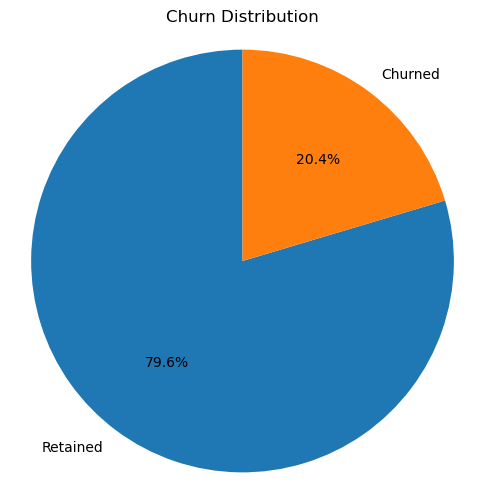

In [40]:
plt.figure(figsize=(6, 6))
churn_counts = data['Exited'].value_counts()
plt.pie(churn_counts, labels=['Retained', 'Churned'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Churn Distribution')
plt.show()

In [41]:
data['Exited'] = data['Exited'].astype(str)

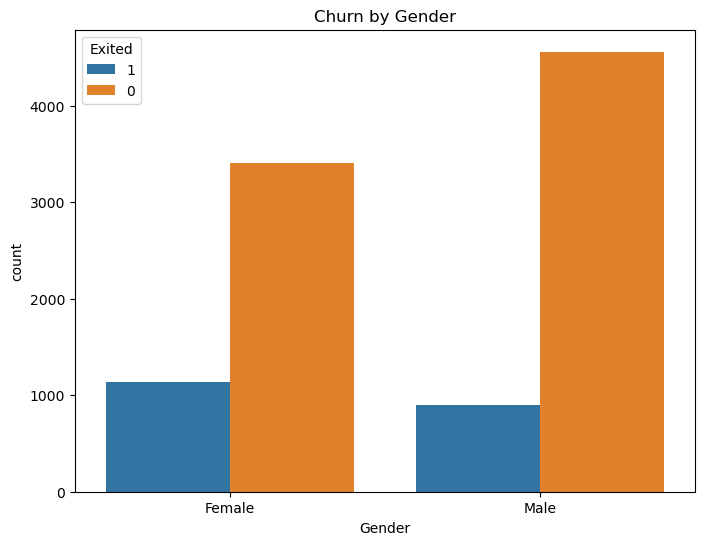

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Exited', data=data)
plt.title('Churn by Gender')
plt.show()

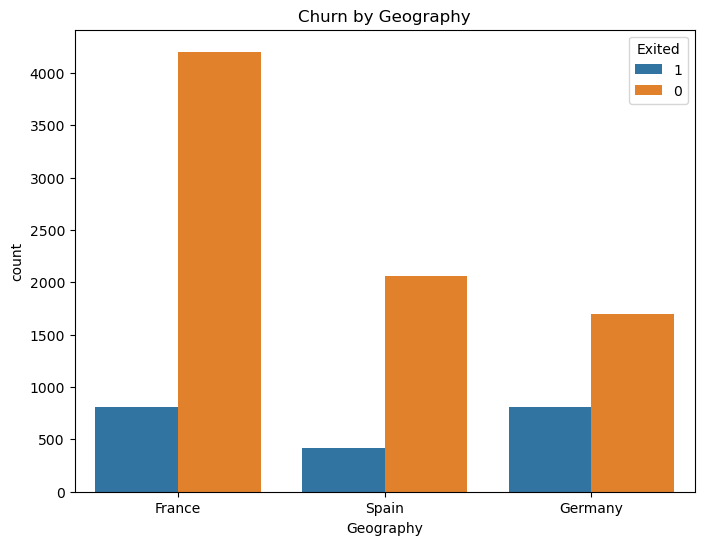

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', hue='Exited', data=data)
plt.title('Churn by Geography')
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


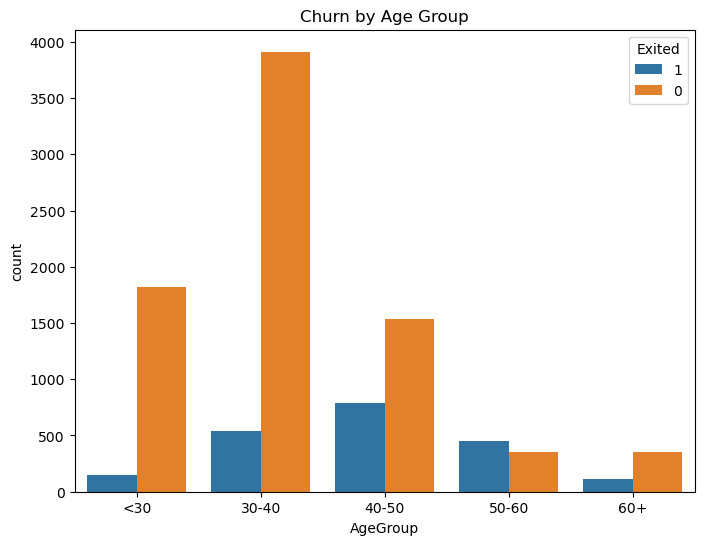

In [44]:
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 30, 40, 50, 60, np.inf], 
                          labels=['<30', '30-40', '40-50', '50-60', '60+'])
plt.figure(figsize=(8, 6))
sns.countplot(x='AgeGroup', hue='Exited', data=data)
plt.title('Churn by Age Group')
plt.show()

## Churn rate by gender

In [45]:
data['Exited'] = data['Exited'].astype(int)

In [46]:
churn_rate_gender = data.groupby('Gender')['Exited'].mean()
print(churn_rate_gender)

Gender
Female    0.250715
Male      0.164743
Name: Exited, dtype: float64


## Churn rate by geography

In [47]:
churn_rate_geography = data.groupby('Geography')['Exited'].mean()
print(churn_rate_geography)

Geography
France     0.161747
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64


## Churn rate by age group

In [48]:
churn_rate_age = data.groupby('AgeGroup')['Exited'].mean()
print(churn_rate_age)

AgeGroup
<30      0.075203
30-40    0.121096
40-50    0.339655
50-60    0.562108
60+      0.247845
Name: Exited, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_15752\3725008336.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_age = data.groupby('AgeGroup')['Exited'].mean()


## Churn by Number of Products

In [50]:
data['Exited'] = data['Exited'].astype(str)

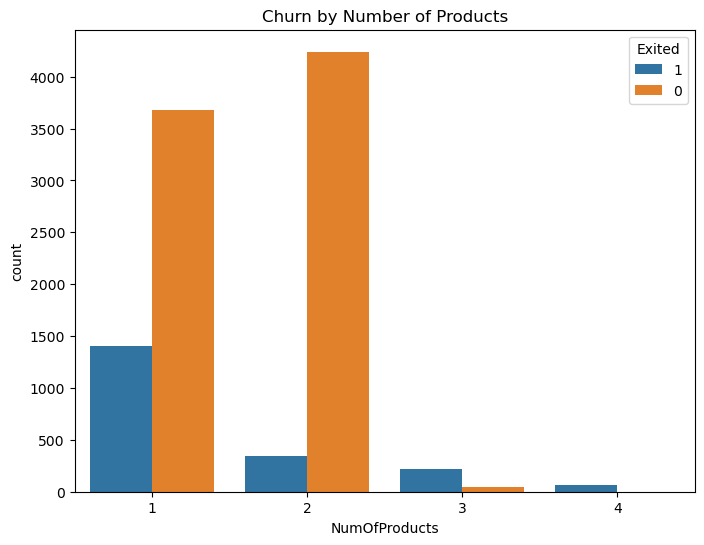

In [51]:
plt.figure(figsize=(8, 6))
sns.countplot(x='NumOfProducts', hue='Exited', data=data)
plt.title('Churn by Number of Products')
plt.show()

## Churn by Credit Card

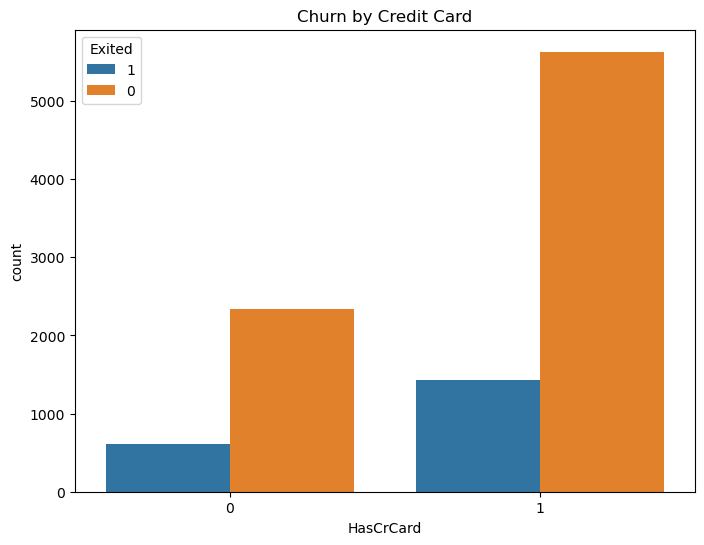

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(x='HasCrCard', hue='Exited', data=data)
plt.title('Churn by Credit Card')
plt.show()

## Churn by Activity Status

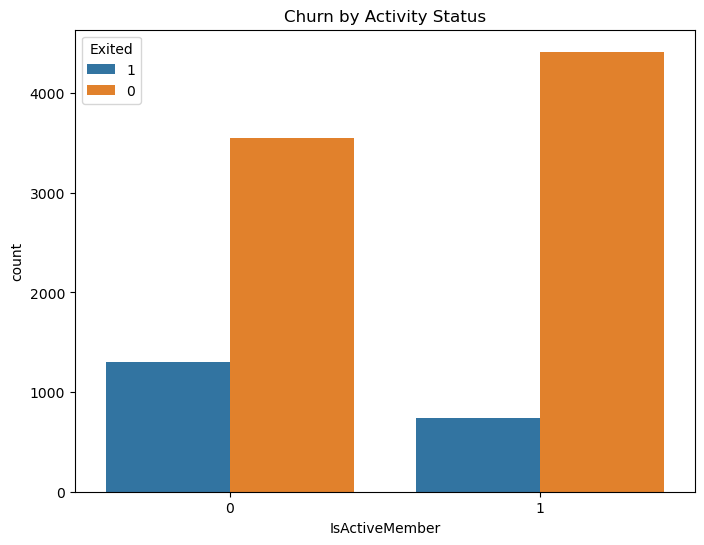

In [53]:
plt.figure(figsize=(8, 6))
sns.countplot(x='IsActiveMember', hue='Exited', data=data)
plt.title('Churn by Activity Status')
plt.show()

## Churn by Balance

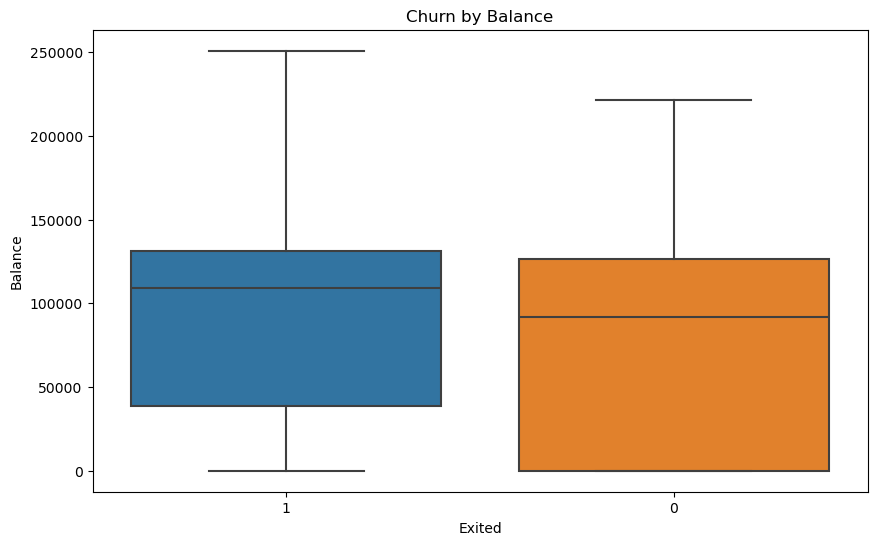

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Balance', data=data)
plt.title('Churn by Balance')
plt.show()

## Churn by Complain

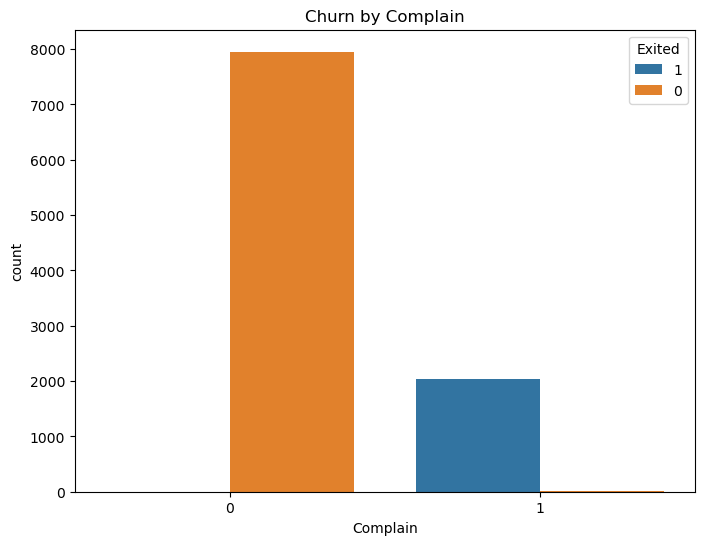

In [55]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Complain', hue='Exited', data=data)
plt.title('Churn by Complain')
plt.show()

# Create Model for prediction

In [56]:
# Drop unnecessarry column
data.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [57]:
data.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,AgeGroup
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,40-50
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,40-50
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,40-50


## Identify features (without 'Exited')

In [58]:
feature = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
        'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned',
       'AgeGroup']

## Categorical Encoding

In [59]:
cat_cols = ["Geography", "Gender", "Card Type", "AgeGroup"]
enc = OrdinalEncoder()
data[cat_cols] = enc.fit_transform(data[cat_cols])

In [60]:
data[cat_cols].nunique()

Geography    3
Gender       2
Card Type    4
AgeGroup     5
dtype: int64

In [61]:
data[cat_cols].sample(3)

,Geography,Gender,Card Type,AgeGroup
9401,1.0,0.0,2.0,1.0
415,2.0,1.0,2.0,4.0
2753,0.0,0.0,3.0,4.0


In [62]:
data[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Geography  10000 non-null  float64
 1   Gender     10000 non-null  float64
 2   Card Type  10000 non-null  float64
 3   AgeGroup   10000 non-null  float64
dtypes: float64(4)
memory usage: 312.6 KB


In [63]:
data.head(3).T

,0,1,2
CreditScore,619,608,502
Geography,0.0,2.0,0.0
Gender,0.0,0.0,0.0
Age,42,41,42
Tenure,2,1,8
Balance,0.0,83807.86,159660.8
NumOfProducts,1,1,3
HasCrCard,1,0,1
IsActiveMember,1,1,0
EstimatedSalary,101348.88,112542.58,113931.57


## Split Train & Test 

In [64]:
X_train, X_test, y_train, y_test = train_test_split(data.drop("Exited", axis=1), 
                                    data["Exited"], test_size=0.20, random_state=42)

## Train and test model

In [65]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("Accuracy on test data: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy on test data: 1.00


## Correlation of features and target

In [66]:
data.corrwith(data['Exited']).sort_values(ascending=False)

Exited                1.000000
Complain              0.995693
Age                   0.285296
Balance               0.118577
Geography             0.035712
EstimatedSalary       0.012490
Point Earned         -0.004628
Satisfaction Score   -0.005849
HasCrCard            -0.006976
AgeGroup             -0.010406
Card Type            -0.010861
Tenure               -0.013656
CreditScore          -0.026771
NumOfProducts        -0.047611
Gender               -0.106267
IsActiveMember       -0.156356
dtype: float64

## Justify visual with model result

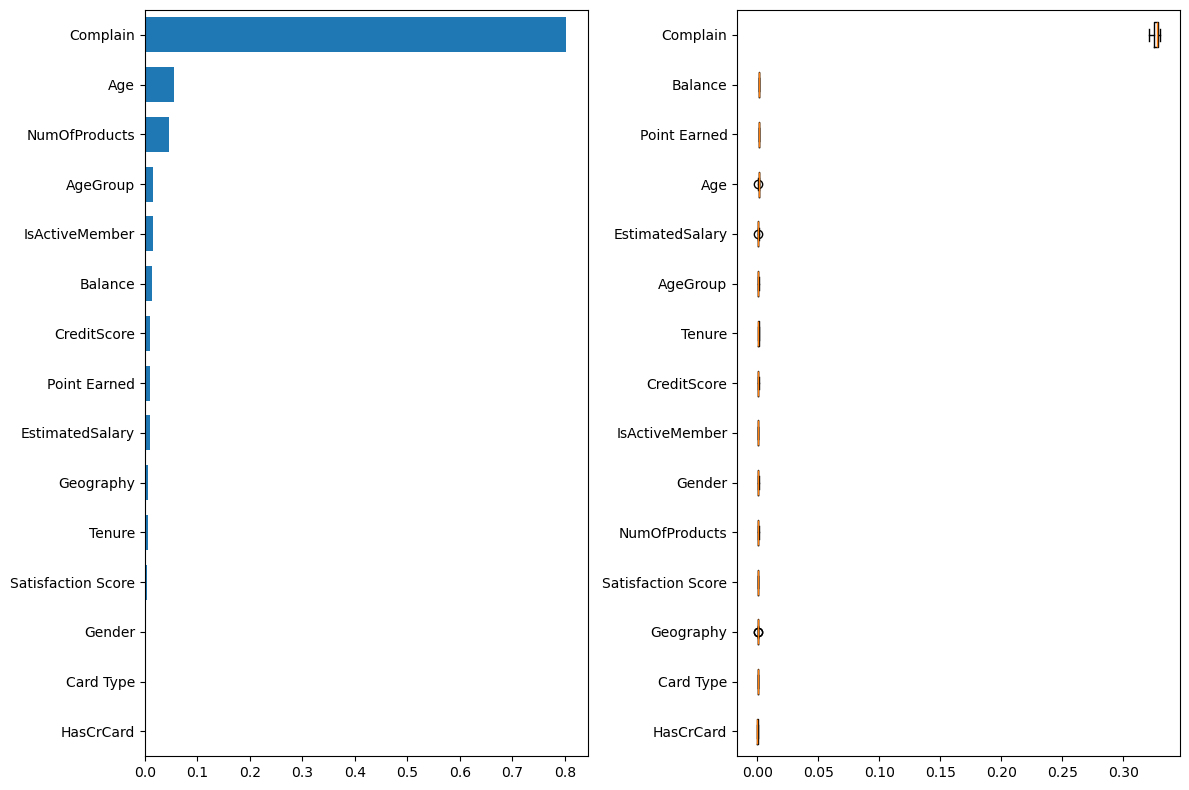

In [67]:
result = permutation_importance(clf, X_train, y_train, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(X_train.columns[tree_importance_sorted_idx])
ax1.set_ylim((0, len(clf.feature_importances_)))
ax2.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=X_train.columns[perm_sorted_idx],
)
fig.tight_layout()
plt.show()